In [3]:
import pandas as pd
df = pd.read_csv('../../mlt/data/balance-scale.data', header=None)

In [5]:
df.columns = ['class', 'lwt', 'ldst', 'rwt', 'rdst']
df.head()

,class,lwt,ldst,rwt,rdst
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Text(0.5, 1.0, '% of classes')

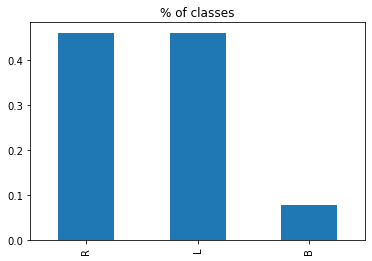

In [12]:
ax = df['class'].value_counts(normalize=True).plot(kind='bar')
ax.set_title('% of classes')

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), df.drop(['class'], axis=1), df['class'].values).mean()

0.5936000000000001

In [8]:
df.shape

(625, 5)

In [9]:
X, y = df.drop(['class'], axis=1).values, df['class'].values

In [11]:
{col: df[col].unique() for col in df}

{'class': array(['B', 'R', 'L'], dtype=object),
 'lwt': array([1, 2, 3, 4, 5]),
 'ldst': array([1, 2, 3, 4, 5]),
 'rwt': array([1, 2, 3, 4, 5]),
 'rdst': array([1, 2, 3, 4, 5])}

In [21]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [22]:
pd.Series(ytr).value_counts(normalize=True)

R    0.462
L    0.460
B    0.078
dtype: float64

In [23]:
pd.Series(yts).value_counts(normalize=True)

L    0.464
R    0.456
B    0.080
dtype: float64

In [42]:
dt = DecisionTreeClassifier(random_state=0, max_depth=4)
dt.fit(xtr, ytr)
dt.score(xtr, ytr), dt.score(xts, yts)

(0.838, 0.76)

In [31]:
dt.get_depth()

10

In [32]:
dt.tree_.max_depth

10

In [33]:
dt.tree_.node_count

247

In [34]:
dt.cost_complexity_pruning_path?

Signature: dt.cost_complexity_pruning_path(X, y, sample_weight=None)
Docstring:
Compute the pruning path during Minimal Cost-Complexity Pruning.

See :ref:`minimal_cost_complexity_pruning` for details on the pruning
process.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The training input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csc_matrix``.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The target values (class labels) as integers or strings.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights. If None, then samples are equally weighted. Splits
    that would create child nodes with net zero or negative weight are
    ignored while searching for a split in each node. Splits are also
    ignored if they would result in any single class carrying a
    negative weight in either child node.

Returns
-------
ccp